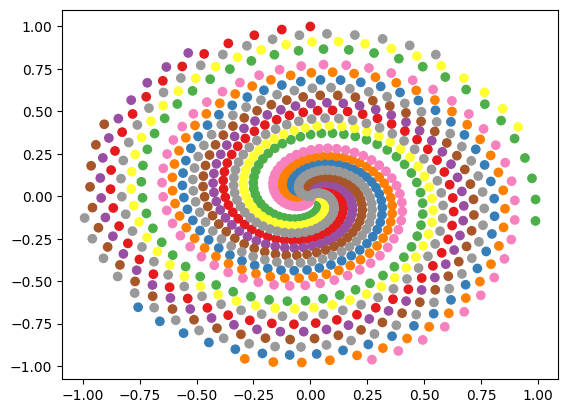

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def make_spiral(n_samples, n_classes, noise=0.5):
    X = []
    y = []
    for class_num in range(n_classes):
        ix = np.linspace(0, 1, n_samples // n_classes)
        r = ix
        t = class_num * 4 + ix * 4 * np.pi + np.random.randn(n_samples // n_classes) * noise
        x1 = r * np.sin(t)
        x2 = r * np.cos(t)
        X.append(np.c_[x1, x2])
        y.append(np.full(n_samples // n_classes, class_num))
    X = np.concatenate(X)
    y = np.concatenate(y)
    return X, y

X, y = make_spiral(1000, 3)
X, y = make_spiral(1000, 10, noise=0.0)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1)
plt.show()

In [5]:
import torch
def make_spiral(n_samples=1000, n_classes=3, noise=0.5, seed=0, device="cpu"):
    np.random.seed(seed)
    X = []
    y = []
    samples_per_class = n_samples // n_classes
    for class_num in range(n_classes):
        ix = np.linspace(0, 1, samples_per_class)
        r = ix
        t = class_num * 4 + ix * 4 * np.pi + np.random.randn(samples_per_class) * noise
        x1 = r * np.sin(t)
        x2 = r * np.cos(t)
        X.append(np.c_[x1, x2])
        y.append(np.full(samples_per_class, class_num))
    X = np.concatenate(X)
    y = np.concatenate(y)
    # Shuffle the data
    idx = np.random.permutation(len(X))
    X = X[idx]
    y = y[idx]
    # Split into train/test (50/50)
    split = len(X) // 2
    train_input, test_input = X[:split], X[split:]
    train_label, test_label = y[:split], y[split:]
    dtype = torch.get_default_dtype()
    dataset = {}
    dataset['train_input'] = torch.from_numpy(train_input).type(dtype).to(device)
    dataset['test_input'] = torch.from_numpy(test_input).type(dtype).to(device)
    dataset['train_label'] = torch.from_numpy(train_label).type(torch.long).to(device)
    dataset['test_label'] = torch.from_numpy(test_label).type(torch.long).to(device)
    return dataset

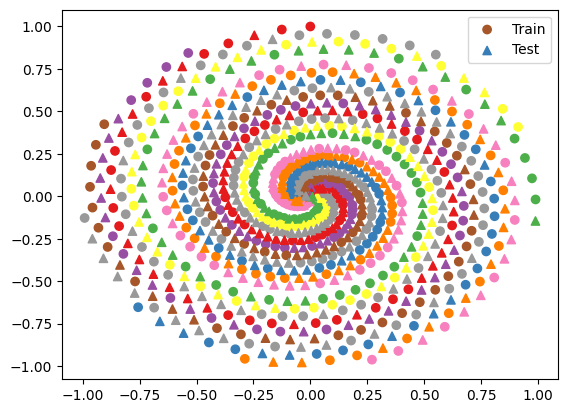

In [6]:
# Create new spiral data using the torch version
dataset = make_spiral(n_samples=1000, n_classes=10, noise=0.0)

# Plot training data as circles
plt.scatter(dataset['train_input'][:,0], dataset['train_input'][:,1], 
           c=dataset['train_label'], cmap=plt.cm.Set1, marker='o', label='Train')

# Plot test data as triangles 
plt.scatter(dataset['test_input'][:,0], dataset['test_input'][:,1],
           c=dataset['test_label'], cmap=plt.cm.Set1, marker='^', label='Test')

plt.legend()
plt.show()

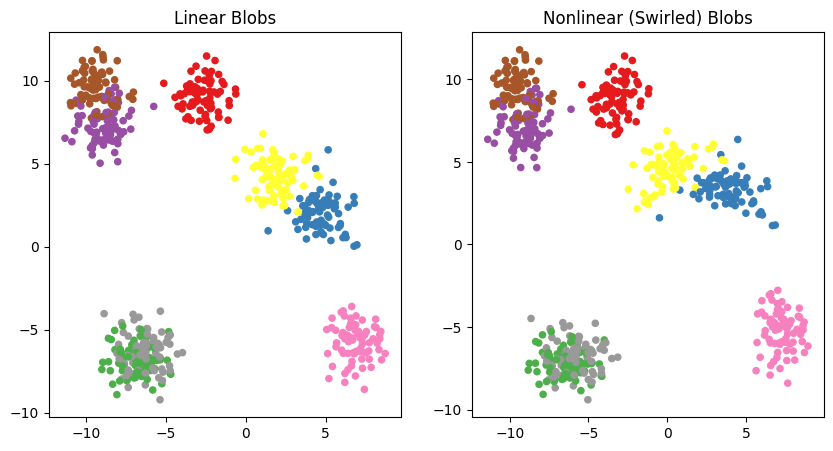

In [10]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def make_nonlinear_blobs(n_samples=300, n_classes=3, nonlinear=True, random_state=None):
    """
    Generate 2D blobs dataset, with optional non-linear transformation.
    
    Parameters:
        n_samples: int, total number of samples
        n_classes: int, number of centers/classes
        nonlinear: bool, if True applies a swirl transformation
        random_state: int or None
        
    Returns:
        X: ndarray, shape (n_samples, 2)
        y: ndarray, shape (n_samples,)
    """
    # Generate blobs
    X, y = make_blobs(n_samples=n_samples,
                      centers=n_classes,
                      n_features=2,
                      random_state=random_state)
    if nonlinear:
        # Swirl transform: twist each point relative to distance from origin
        def swirl(x, y, strength=2.0, scale=1.0):
            r = np.sqrt(x**2 + y**2)
            theta = np.arctan2(y, x) + strength * np.exp(-r/scale)
            return r * np.cos(theta), r * np.sin(theta)
        x_swirl, y_swirl = swirl(X[:,0], X[:,1], strength=2.5, scale=2.5)
        X = np.stack([x_swirl, y_swirl], axis=1)
    return X, y

# Example demonstration
if __name__ == "__main__":
    X_lin, y_lin = make_nonlinear_blobs(n_samples=600, n_classes=8, nonlinear=False, random_state=42)
    X_nl, y_nl   = make_nonlinear_blobs(n_samples=600, n_classes=8, nonlinear=True, random_state=42)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.scatter(X_lin[:,0], X_lin[:,1], c=y_lin, cmap='Set1', s=20)
    ax1.set_title("Linear Blobs")
    ax2.scatter(X_nl[:,0], X_nl[:,1], c=y_nl, cmap='Set1', s=20)
    ax2.set_title("Nonlinear (Swirled) Blobs")
    plt.show()